# Health site near you

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading Files

In [2]:
# gpd.read_file?

### Shapefile

In [3]:
# Read shapefile
ph = gpd.read_file('./datasets/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

GID_0       NAME_0     GID_1               NAME_1 VARNAME_1 NL_NAME_1  \
0    PHL  Philippines   PHL.1_1                 Abra      None      None   
1    PHL  Philippines   PHL.2_1     Agusan del Norte      None      None   
2    PHL  Philippines   PHL.3_1       Agusan del Sur      None      None   
3    PHL  Philippines   PHL.4_1                Aklan      None      None   
4    PHL  Philippines   PHL.5_1                Albay      None      None   
5    PHL  Philippines   PHL.6_1              Antique      None      None   
6    PHL  Philippines   PHL.7_1               Apayao      None      None   
7    PHL  Philippines   PHL.8_1               Aurora      None      None   
8    PHL  Philippines   PHL.9_1              Basilan      None      None   
9    PHL  Philippines  PHL.10_1               Bataan      None      None   
10   PHL  Philippines  PHL.11_1              Batanes      None      None   
11   PHL  Philippines  PHL.12_1             Batangas      None      None   
12   PHL  Philippines  PHL.13_1              Benguet      None      None   
13   PHL  Philippines  PHL.14_1              Biliran      None      None   
14   PHL  Philippines  PHL.15_1                Bohol      None      None   
15   PHL  Philippines  PHL.16_1             Bukidnon      None      None   
16   PHL  Philippines  PHL.17_1              Bulacan      None      None   
17   PHL  Philippines  PHL.18_1              Cagayan      None      None   
18   PHL  Philippines  PHL.19_1      Camarines Norte      None      None   
19   PHL  Philippines  PHL.20_1        Camarines Sur      None      None   
20   PHL  Philippines  PHL.21_1             Camiguin      None      None   
21   PHL  Philippines  PHL.22_1                Capiz      None      None   
22   PHL  Philippines  PHL.23_1          Catanduanes      None      None   
23   PHL  Philippines  PHL.24_1               Cavite      None      None   
24   PHL  Philippines  PHL.25_1                 Cebu      None      None   
25   PHL  Philippines  PHL.26_1    Compostela Valley      None      None   
26   PHL  Philippines  PHL.27_1      Davao del Norte     Davao      None   
27   PHL  Philippines  PHL.28_1        Davao del Sur      None      None   
28   PHL  Philippines  PHL.29_1       Davao Oriental      None      None   
29   PHL  Philippines  PHL.30_1      Dinagat Islands      None      None   
30   PHL  Philippines  PHL.31_1        Eastern Samar      None      None   
31   PHL  Philippines  PHL.32_1             Guimaras      None      None   
32   PHL  Philippines  PHL.33_1               Ifugao      None      None   
33   PHL  Philippines  PHL.34_1         Ilocos Norte      None      None   
34   PHL  Philippines  PHL.35_1           Ilocos Sur      None      None   
35   PHL  Philippines  PHL.36_1               Iloilo      None      None   
36   PHL  Philippines  PHL.37_1              Isabela      None      None   
37   PHL  Philippines  PHL.38_1              Kalinga      None      None   
38   PHL  Philippines  PHL.39_1             La Union      None      None   
39   PHL  Philippines  PHL.40_1               Laguna      None      None   
40   PHL  Philippines  PHL.41_1      Lanao del Norte      None      None   
41   PHL  Philippines  PHL.42_1        Lanao del Sur      None      None   
42   PHL  Philippines  PHL.43_1                Leyte      None      None   
43   PHL  Philippines  PHL.44_1          Maguindanao      None      None   
44   PHL  Philippines  PHL.45_1           Marinduque      None      None   
45   PHL  Philippines  PHL.46_1              Masbate      None      None   
46   PHL  Philippines  PHL.47_1  Metropolitan Manila      None      None   
47   PHL  Philippines  PHL.48_1   Misamis Occidental      None      None   
48   PHL  Philippines  PHL.49_1     Misamis Oriental      None      None   
49   PHL  Philippines  PHL.50_1    Mountain Province      None      None   

                 TYPE_1 ENGTYPE_1  CC_1 HASC_1  \
0   Lalawigan|Probinsya  Province  1401  PH.AB   
1   Lalawigan|Probinsya  P

### GeoJSON

In [4]:
# Read GeoJSON file
healthsites = gpd.read_file('datasets/philippines.geojson', driver='GeoJSON')
healthsites.head()

osm_id osm_type  completeness is_in_health_zone   amenity speciality  \
0  4714668590     node           9.0                    pharmacy              
1  6489465986     node           9.0                     doctors              
2   775561027      way          31.0                    hospital              
3   497119467     node          15.0                    pharmacy              
4   601647960      way          12.0                    hospital              

         addr_street              operator water_source  changeset_id  ...  \
0                                                          46542719.0  ...   
1                                                          70494207.0  ...   
2  Dalan na Pagayaya  Department of Health                 81346192.0  ...   
3          Shorthorn                                       86331991.0  ...   
4                                                          60145823.0  ...   

  changeset_user wheelchair beds url dispensing healthcare operator_type  \
0          Innoc                                                           
1     RenAshbell                                                           
2        mapbeks                                  hospital    government   
3       mipangan                                                           
4          GOwin                                                           

  part_time_beds   tag                                           geometry  
0           None  None                         POINT (122.63445 10.94470)  
1           None  None                          POINT (124.24163 8.22731)  
2           None  None  POLYGON ((121.74563 17.65639, 121.74616 17.657...  
3           None  None                         POINT (121.02008 14.66840)  
4           None  None  POLYGON ((120.45718 15.80609, 120.45738 15.806...  

[5 rows x 38 columns]

## Extracting Data

This notebook will cover the following areas in the Philippines:
1. Davao del Sur
2. Metro Manila

In [5]:
ph.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
healthsites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# Get data from Davao del Sur and Metro Manila
dvo = ph[ph['NAME_1'] == 'Davao del Sur']
mnl = ph[ph['NAME_1'] == 'Metropolitan Manila']

In [8]:
# Determine which amenities are available
healthsites['amenity'].unique()

array(['pharmacy', 'doctors', 'hospital', 'clinic', 'dentist', '',
       'laboratory', 'social_facility', 'healthcare'], dtype=object)

In [9]:
amenities = healthsites['amenity'].unique()
amenities

array(['pharmacy', 'doctors', 'hospital', 'clinic', 'dentist', '',
       'laboratory', 'social_facility', 'healthcare'], dtype=object)

In [10]:
# amenities = np.delete(amenities, 5)

In [11]:
# # Assign variables for each health amenity
# pharmacy = healthsites[healthsites['amenity'] == 'pharmacy']
# doctors = healthsites[healthsites['amenity'] == 'doctors']
# hospital = healthsites[healthsites['amenity'] == 'hospital']
# clinic = healthsites[healthsites['amenity'] == 'clinic']
# dentist = healthsites[healthsites['amenity'] == 'dentist']
# laboratory = healthsites[healthsites['amenity'] == 'laboratory']
# social_facility = healthsites[healthsites['amenity'] == 'social_facility']
# healthcare = healthsites[healthsites['amenity'] == 'healthcare']

In [12]:
# amenities = [pharmacy,doctors,hospital,clinic,dentist,health_amenity,laboratory,social_facility,healthcare]

## Visualization

In [13]:
# gpd.sjoin?

In [14]:
# for i in amenities:
#     print(i)

### Health-related amenities in Davao del Sur

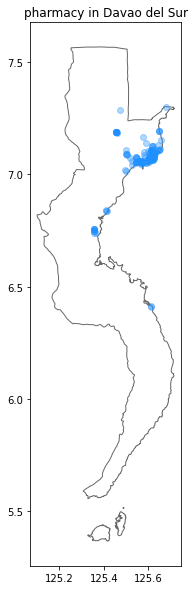

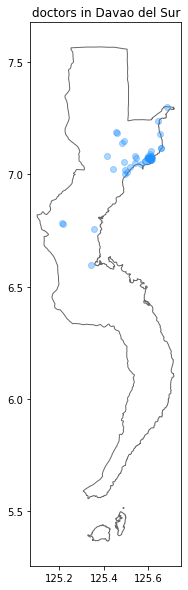

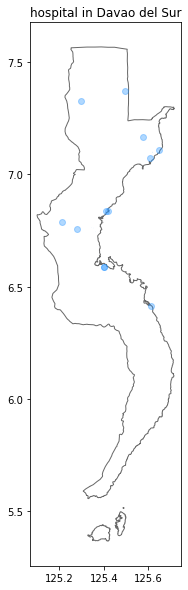

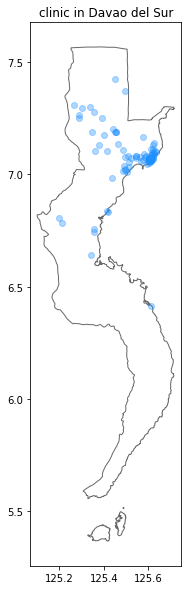

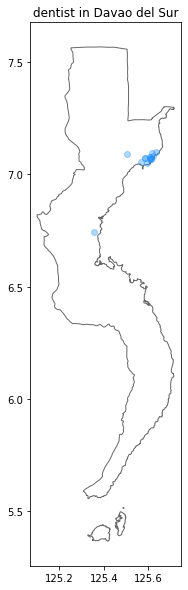

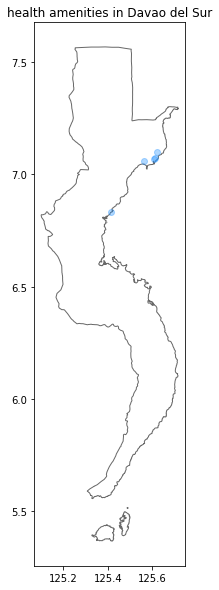

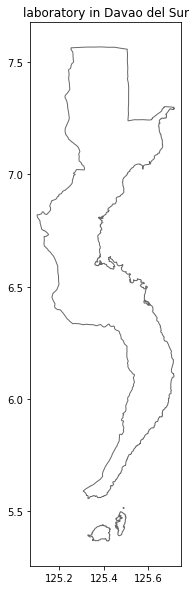

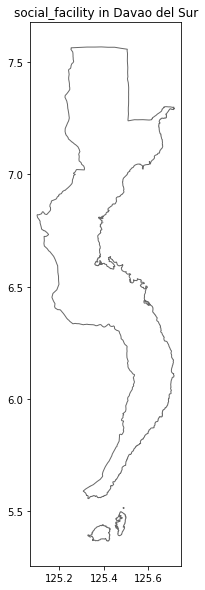

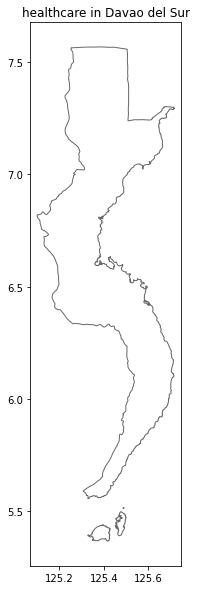

In [24]:
for i in amenities:
    amenity = healthsites[healthsites['amenity'] == i]
    ax = dvo.plot(figsize=(10,10), color='white', edgecolor='dimgray')
    join = gpd.sjoin(amenity, dvo, op='within')
    if(join.empty == 0): join.plot(ax=ax, color='dodgerblue', alpha=0.35)
    if(i == ''): ax.set_title('health amenities in Davao del Sur')
    else: ax.set_title(i + ' in Davao del Sur')
#     ax.axis('off')

### Health-related amenities in Metro Manila

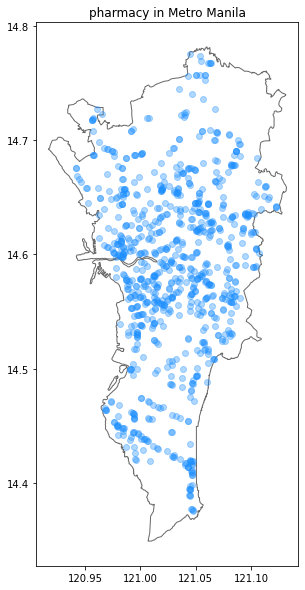

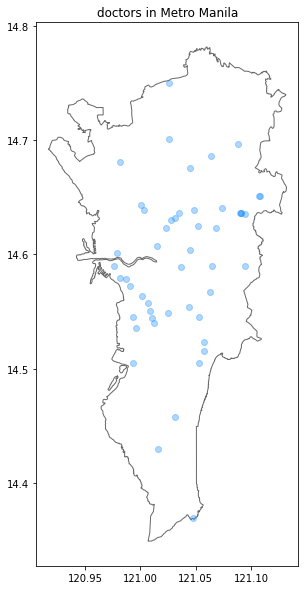

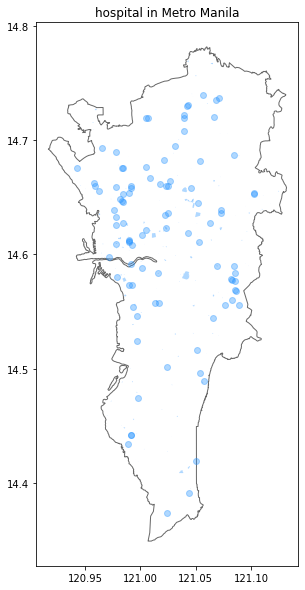

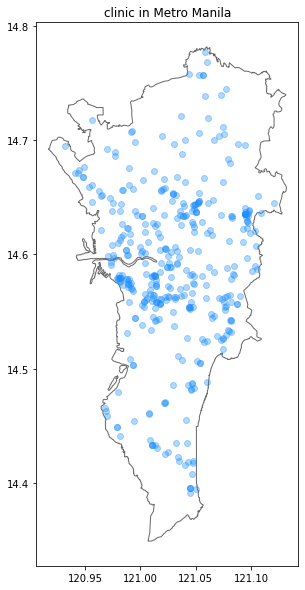

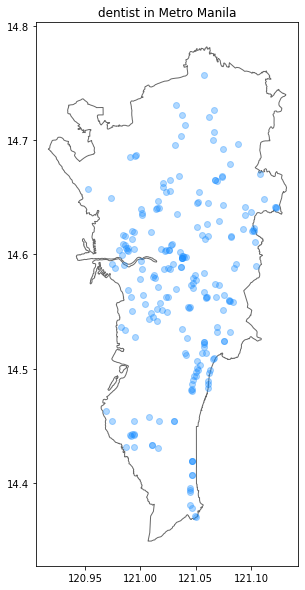

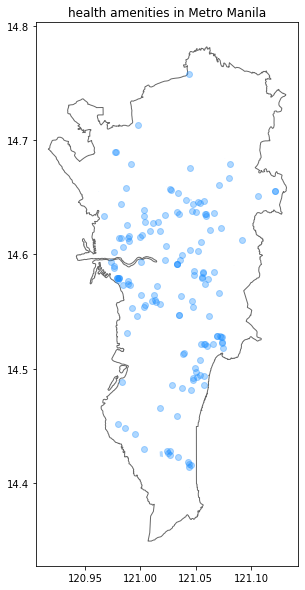

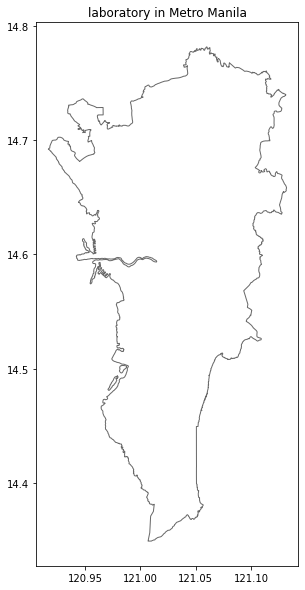

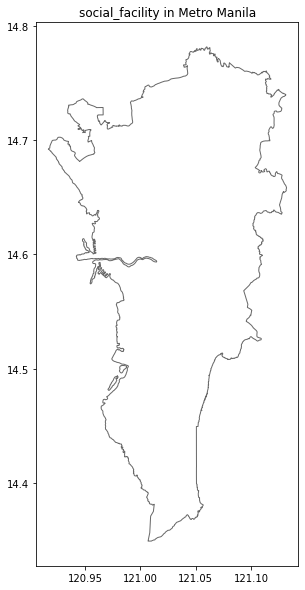

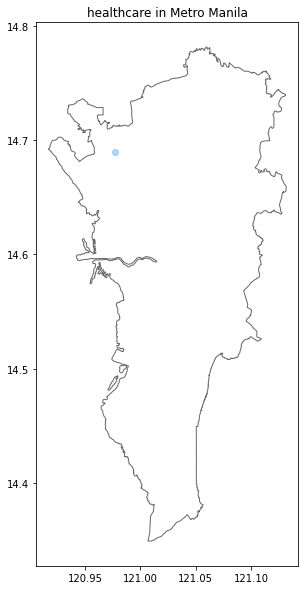

In [23]:
for i in amenities:
    amenity = healthsites[healthsites['amenity'] == i]
    ax = mnl.plot(figsize=(10,10), color='white', edgecolor='dimgray')
    join = gpd.sjoin(amenity, mnl, op='within')
    if(join.empty == 0): join.plot(ax=ax, color='dodgerblue', alpha=0.35)
    if(i == ''): ax.set_title('health amenities in Metro Manila')
    else: ax.set_title(i + ' in Metro Manila')
#     ax.axis('off')

### Health-related Amenities in Davao and Manila

In [19]:
davao = gpd.sjoin(healthsites, dvo, op='within')

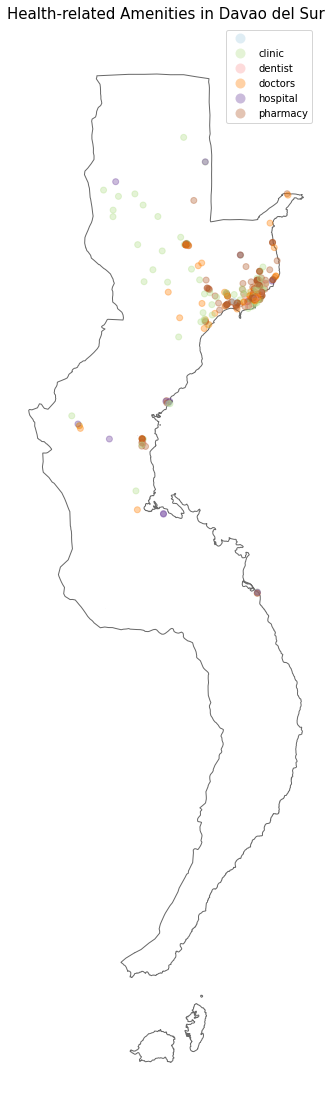

In [20]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(111)

dvo.plot(ax=ax, color='white', edgecolor='dimgray')
davao.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Davao del Sur', fontsize=15)
plt.savefig('visualization-dvo')
ax.axis('off');

In [21]:
manila = gpd.sjoin(healthsites, mnl, op='within')

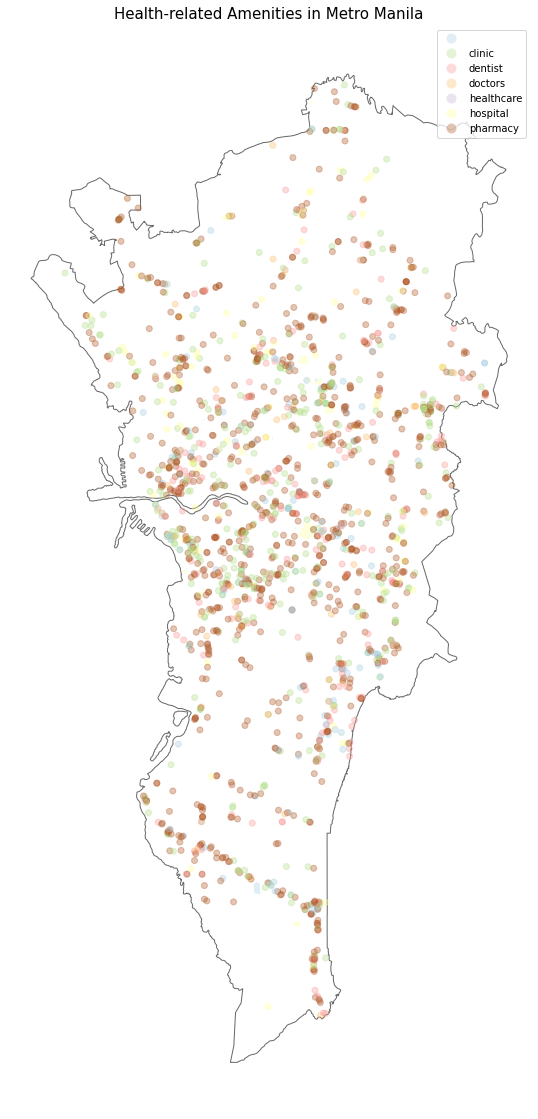

In [22]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(111)

mnl.plot(ax=ax, color='white', edgecolor='dimgray')
manila.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Metro Manila', fontsize=15)
plt.savefig('visualization-mnl')
ax.axis('off');